In [54]:
import os 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Dropout, GlobalAveragePooling2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau ,EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import load_img

Show images 

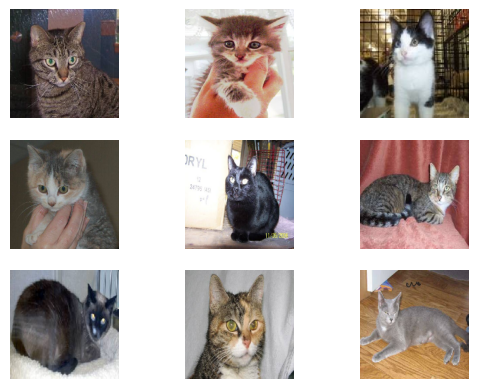

In [55]:
folder_path = r'C:\Users\MAHADEV\OneDrive\Desktop\Zeel\Data Science\Tops\Fair work\Work\Deep Learning\Assessment\dogs_vs_cats'
animal = 'cats'
picture_size = 224

for i in range(1,10):
    plt.subplot(3,3,i)

    folder = os.path.join(folder_path,'train',animal)
    filename = os.listdir(folder)[i]

    img = load_img(os.path.join(folder,filename), target_size=(picture_size,picture_size))

    plt.imshow(img)
    plt.axis('off')

In [56]:
train_path = r'C:\Users\MAHADEV\OneDrive\Desktop\Zeel\Data Science\Tops\Fair work\Work\Deep Learning\Assessment\train'
test_path = r'C:\Users\MAHADEV\OneDrive\Desktop\Zeel\Data Science\Tops\Fair work\Work\Deep Learning\Assessment\test'

In [57]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalization

In [58]:
def process(image,label):
    image = tf.cast(image/255., tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)

Create CNN model 

In [66]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'),
    Dropout(0.5),

    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'),
    Dropout(0.5),
    
    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding = 'valid'),
    Dropout(0.5),

    Flatten(),

    Dense(128, activation = 'relu'),
    
    Dense(64,activation = 'relu'),
    
    Dense(1,activation = 'sigmoid')
])

In [67]:
# model.summary()

In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [69]:
history = model.fit(
    train_dataset,
    epochs = 5,
    validation_data = test_dataset
)

Epoch 1/5


625/625 [==============================] - 99s 157ms/step - loss: 0.7339 - accuracy: 0.5303 - val_loss: 0.6738 - val_accuracy: 0.5980
Epoch 2/5
625/625 [==============================] - 94s 151ms/step - loss: 0.6417 - accuracy: 0.6273 - val_loss: 0.5944 - val_accuracy: 0.6888
Epoch 3/5
625/625 [==============================] - 93s 148ms/step - loss: 0.5770 - accuracy: 0.6933 - val_loss: 0.5925 - val_accuracy: 0.6758
Epoch 4/5
625/625 [==============================] - 93s 148ms/step - loss: 0.5117 - accuracy: 0.7426 - val_loss: 0.5126 - val_accuracy: 0.7486
Epoch 5/5
625/625 [==============================] - 94s 150ms/step - loss: 0.4533 - accuracy: 0.7818 - val_loss: 0.5254 - val_accuracy: 0.7540


In [70]:
model.save('model2.h5')